In [16]:
import numpy as np
from glob import glob
import os
import SimpleITK as sitk
import nibabel as nib

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FuncFormatter
%matplotlib inline

In [17]:
sample_data = glob('../data/ISLES_2017/Training/training_1/*/*.nii')

In [18]:
os.listdir('../data/ISLES_2017/Training/training_1/')

['VSD.Brain.XX.O.MR_4DPWI.127015',
 'VSD.Brain.XX.O.MR_ADC.128020',
 'VSD.Brain.XX.O.MR_MTT.127014',
 'VSD.Brain.XX.O.MR_rCBF.127016',
 'VSD.Brain.XX.O.MR_rCBV.127017',
 'VSD.Brain.XX.O.MR_Tmax.127018',
 'VSD.Brain.XX.O.MR_TTP.127019',
 'VSD.Brain.XX.O.OT.128050']

In [19]:
MR_4DPWI = glob('../data/ISLES_2017/Training/*/*.MR_4DPWI.*/*.nii')
MR_ADC   = glob('../data/ISLES_2017/Training/*/*.MR_ADC.*/*.nii')
MR_MTT   = glob('../data/ISLES_2017/Training/*/*.MR_MTT.*/*.nii')
MR_rCBF  = glob('../data/ISLES_2017/Training/*/*.MR_rCBF.*/*.nii')
MR_rCBV  = glob('../data/ISLES_2017/../data/ISLES_2017/Training/*/*.MR_rCBV.*/*.nii')
MR_Tmax  = glob('../data/ISLES_2017/Training/*/*.MR_Tmax.*/*.nii')
MR_TTP   = glob('../data/ISLES_2017/Training/*/*.MR_TTP.*/*.nii')
OT       = glob('../data/ISLES_2017/Training/*/*.OT.*/*.nii')

In [20]:
MR_list = [data_path.split('.')[4] for data_path in os.listdir('../data/ISLES_2017/Training/training_1')]
print("MR List : ", MR_list)

MR List :  ['MR_4DPWI', 'MR_ADC', 'MR_MTT', 'MR_rCBF', 'MR_rCBV', 'MR_Tmax', 'MR_TTP', 'OT']


In [21]:
def read_data(data):
    img = nib.load(data).get_data()
    if len(img.shape) == 3:
        img = img.transpose(2, 0, 1).astype(int)
    elif len(img.shape) == 4:
        img = img.transpose(2, 0, 1, 3).astype(int)
    elif len(img.shape) == 5:
        img = img.transpose(3, 2, 0, 1, 4).astype(int)
        img = img[0]
    return img

In [22]:
def extract_channel(list_img):
    unique_list = {}
    for i in list_img:
        img = read_data(i)

        if str(img.shape) in unique_list:
            unique_list[str(img.shape)] += 1   
        else:
            unique_list[str(img.shape)] = 1        
    print(unique_list)

# Minimum and Maximum Value of Each Patients

In [23]:
for MR in MR_list[1:]:
    MR_imgs = glob('../data/ISLES_2017/Training/*/*.'+MR+'.*/*.nii')

    min_values = []
    max_values = []

    for img_path in MR_imgs:
        sitk_img = sitk.ReadImage(img_path)
        img = sitk.GetArrayFromImage(sitk_img)
        if img.min() not in min_values:
            min_values.append(img.min())
        if img.max() not in max_values:
            max_values.append(img.max())

    print('\n' + MR + ' Min Values : ' + str(min_values))
    print(MR + ' Max Values : ' + str(max_values))
    print("Image Channels")
    extract_channel(MR_imgs)


MR_ADC Min Values : [0]
MR_ADC Max Values : [3766, 3926, 3545, 3541, 461, 451, 3945, 479, 3657, 438, 3911, 4095, 3711, 449, 422, 464, 432, 4036, 3963, 3998.0, 3913.0, 3947.0, 3735, 3656.0, 3741.0, 3990.0, 3482.0, 3821.0, 3862.0, 3928.0, 483, 4076]
Image Channels
{'(19, 192, 192)': 17, '(25, 128, 128)': 10, '(24, 256, 256)': 9, '(30, 192, 192)': 6, '(24, 192, 192)': 1}

MR_MTT Min Values : [-1.0, 0.0, -0.91700983, -0.8535794, -1.0579702, -0.019958964, -1.0295125, -1.1887921, -1.0551666, -0.083766237, -1.8910903, -0.022213113, -0.81732178, -0.95032215, -2.288327]
MR_MTT Max Values : [47.51685, 45.157307, 33.685833, 56.6478, 24.998171, 23.999979, 47.994083, 21.998692, 38.991245, 18.575832, 59.938046, 36.993046, 56.985889, 25.980087, 23.975115, 22.566339, 25.997742, 36.654366, 35.333954, 35.606178, 27.20698, 40.440258, 28.500103, 27.967285, 30.055292, 38.662945, 36.636318, 41.015099, 36.54977, 32.131828, 38.325089, 31.424322, 49.12159, 39.932621, 22.941015, 29.415092, 34.577389, 89.485008

# Information of Each Image Data

In [42]:
for img_path in sample_data:
    image = sitk.ReadImage(img_path)
    fname = img_path.split('\\')[-1].split('.')[-3]
    img = sitk.GetArrayFromImage(image)

    print("\n\n============ "+fname+" ============")
    print("Image Size : ", image.GetSize())
    print("Image Shape: ", img.shape)
    print("Space Size : ", image.GetSpacing())
    print("Origin     : ", image.GetOrigin())
    print("=================================")
    print("Image Width : ", image.GetWidth())
    print("Image Height: ", image.GetHeight())
    print("Image Depth : ", image.GetDepth())
    print("=================================")
    print("Image Dimension  : ", image.GetDimension())
    print("Image PixelValue : ", image.GetPixelIDValue())
    print("Image PixelIDTypeAsString : ", image.GetPixelIDTypeAsString())
    print("=================================")
    print("Image Max Value    : ", img.max())
    print("Image Min Value    : ", img.min())
    print("Image Mean Value   : ", img.mean())
    print("Image Median Value : ", np.median(img))
    print("=================================")
    print()



============ MR_4DPWI ============
Image Size :  (192, 192, 19)
Image Shape:  (19, 192, 192, 80)
Space Size :  (1.1979166269302368, 1.1979166269302368, 6.499999523162842)
Origin     :  (-120.3366928100586, -141.37106323242188, 8.357967376708984)
Image Width :  192
Image Height:  192
Image Depth :  19
Image Dimension  :  3
Image PixelValue :  14
Image PixelIDTypeAsString :  vector of 16-bit signed integer
Image Max Value    :  2115
Image Min Value    :  -6
Image Mean Value   :  155.19873129
Image Median Value :  0.0


============ MR_ADC ============
Image Size :  (192, 192, 19)
Image Shape:  (19, 192, 192)
Space Size :  (1.1979166269302368, 1.1979166269302368, 6.499999523162842)
Origin     :  (-120.3366928100586, -141.37106323242188, 8.357967376708984)
Image Width :  192
Image Height:  192
Image Depth :  19
Image Dimension  :  3
Image PixelValue :  2
Image PixelIDTypeAsString :  16-bit signed integer
Image Max Value    :  3766
Image Min Value    :  0
Image Mean Value   :  272.2719383

# Histograms of Image Pixels (First Patient)

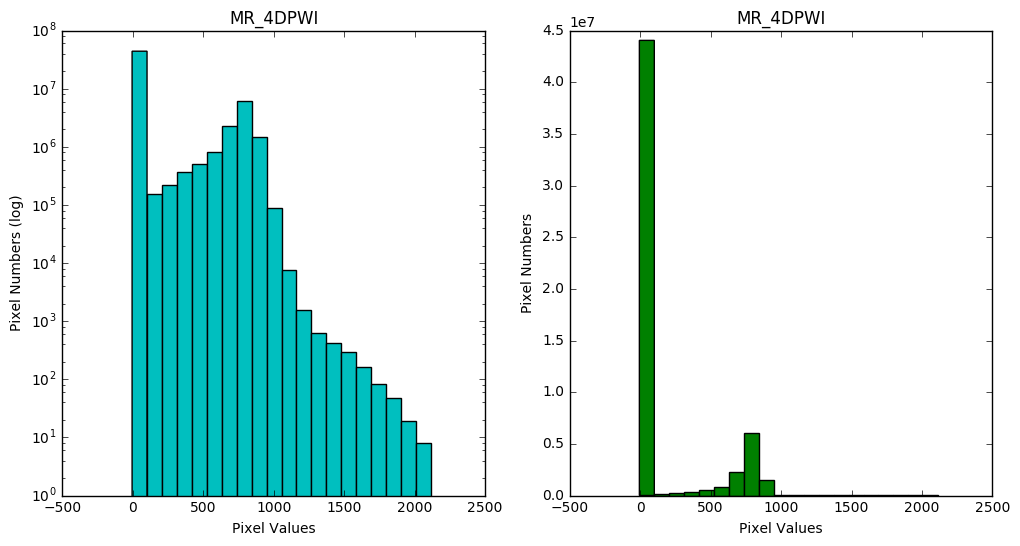

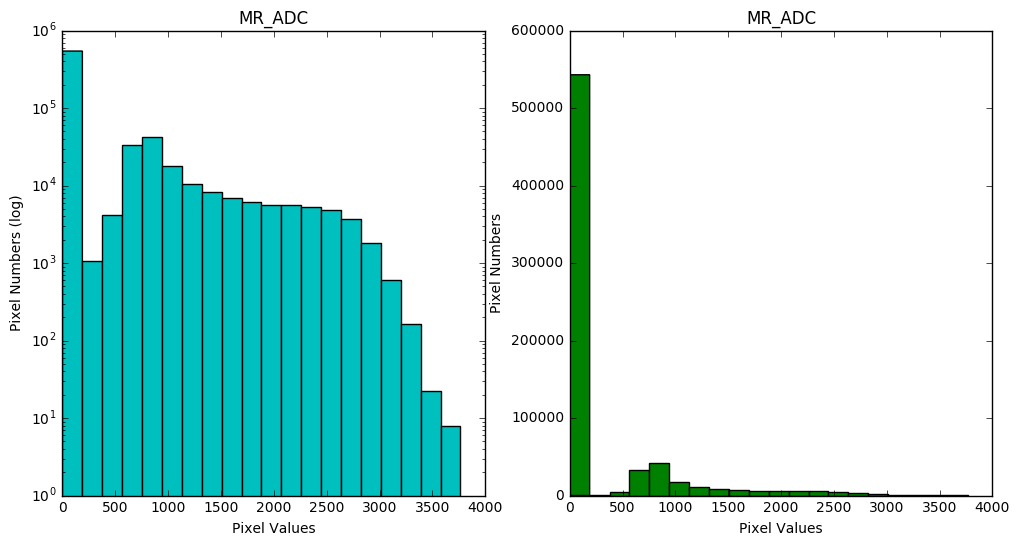

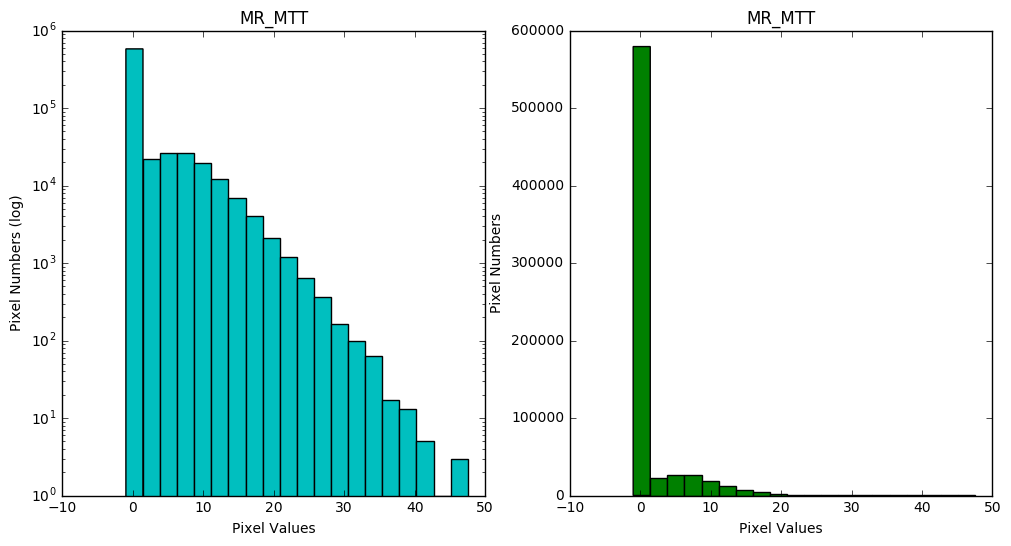

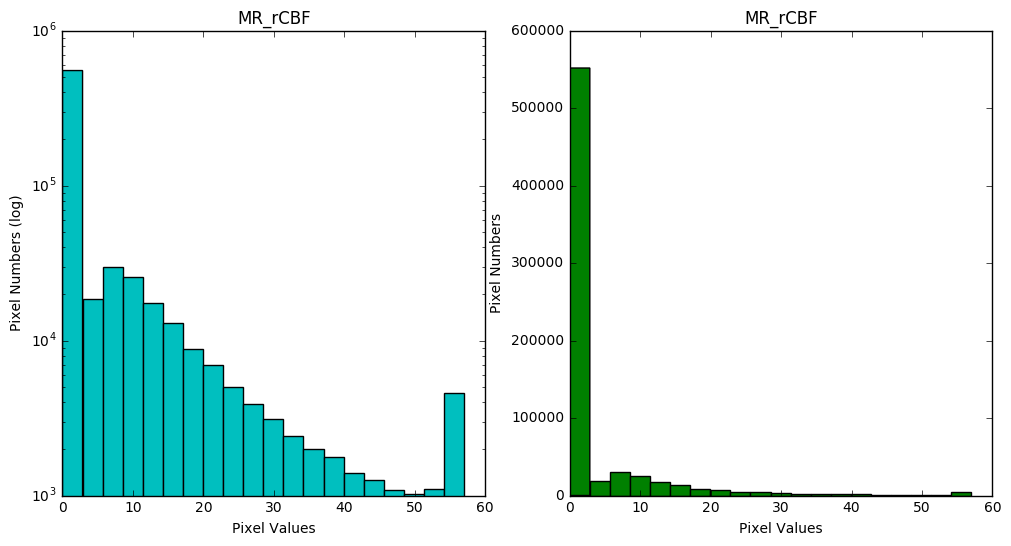

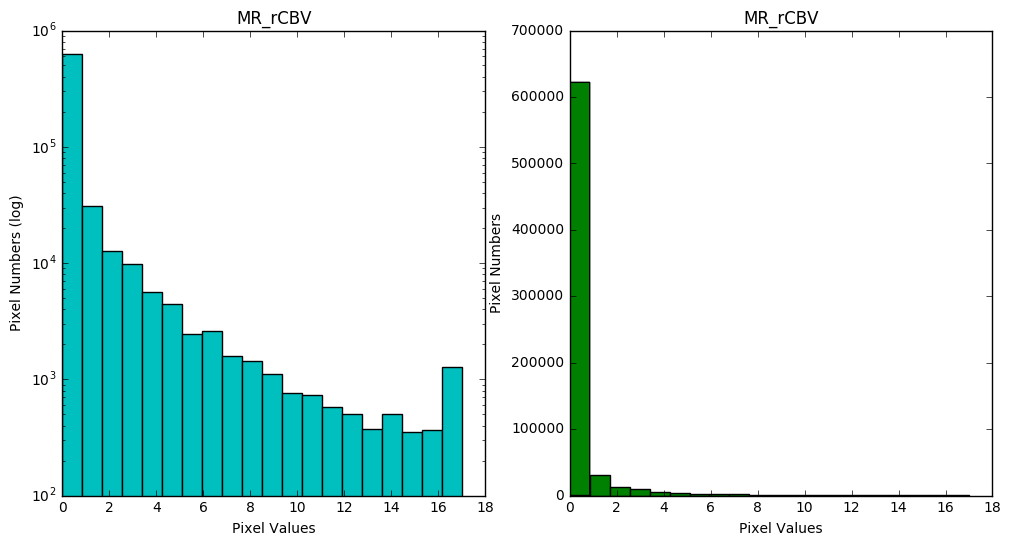

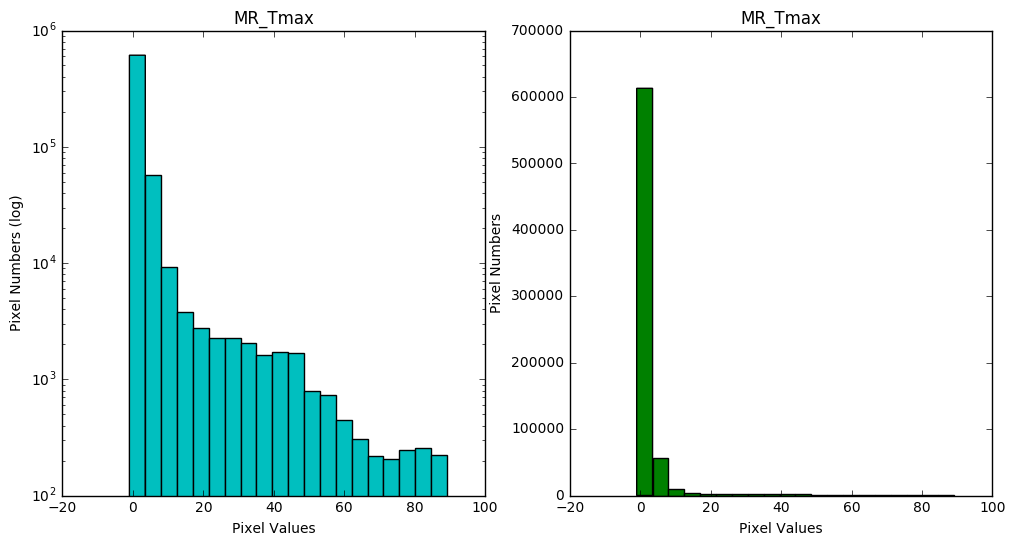

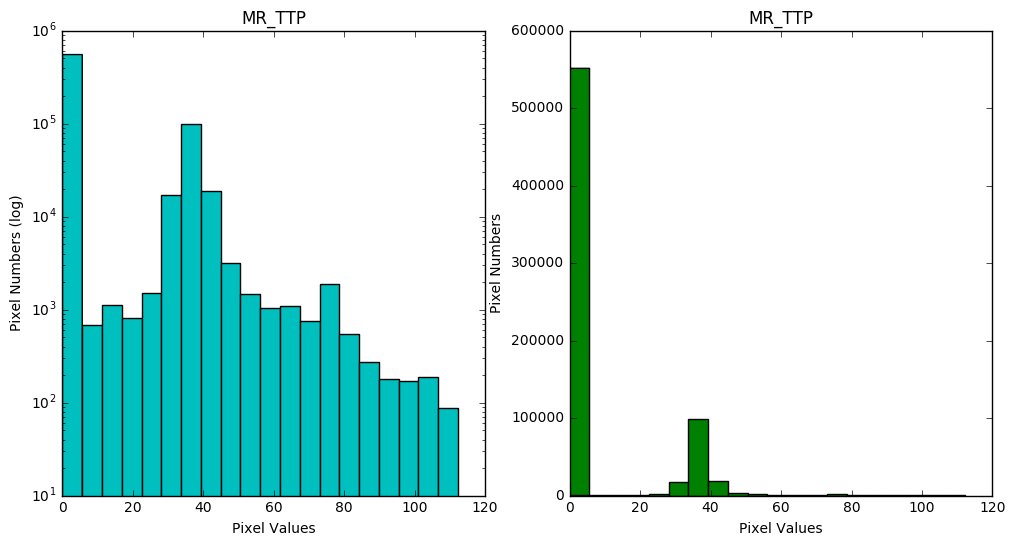

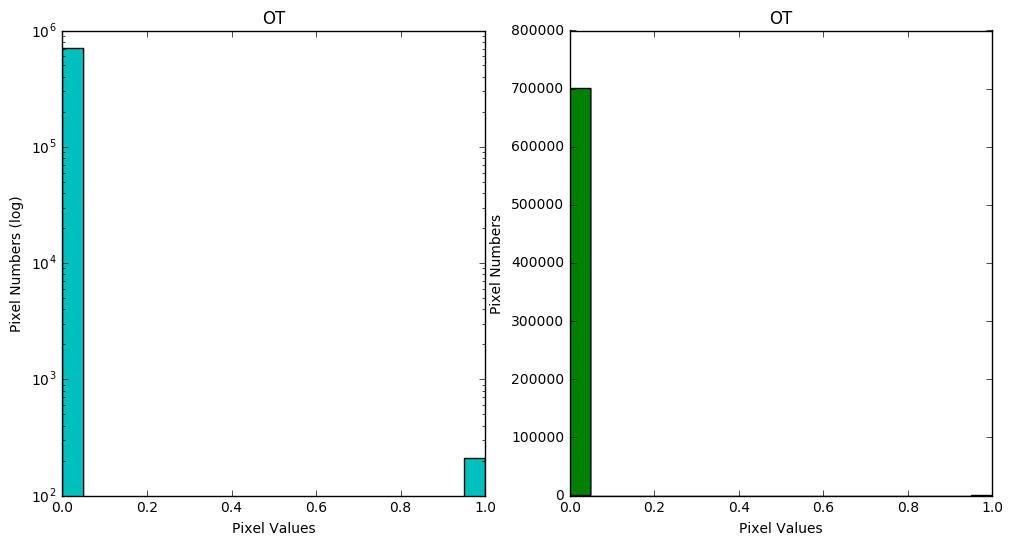

In [32]:
# https://stackoverflow.com/questions/3677368/matplotlib-format-axis-offset-values-to-whole-numbers-or-specific-number

for n, img_path in enumerate(sample_data):
    fname = img_path.split('\\')[-1].split('.')[-3]
    sitk_img = sitk.ReadImage(img_path)
    img = sitk.GetArrayFromImage(sitk_img)
    
    plt.figure(n, figsize=(12,6))
    plt.subplot(1,2,1); plt.title(fname); plt.hist(img.flatten(), bins=20, color='c', log=True)
    plt.ylabel('Pixel Numbers'+" (log)"); plt.xlabel('Pixel Values')
    plt.subplot(1,2,2); plt.title(fname); plt.hist(img.flatten(), bins=20, color='g', log=False)
    plt.ylabel('Pixel Numbers'); plt.xlabel('Pixel Values')
    
plt.show()


# the Image 4DPWI by each channels

(19, 192, 192, 80)


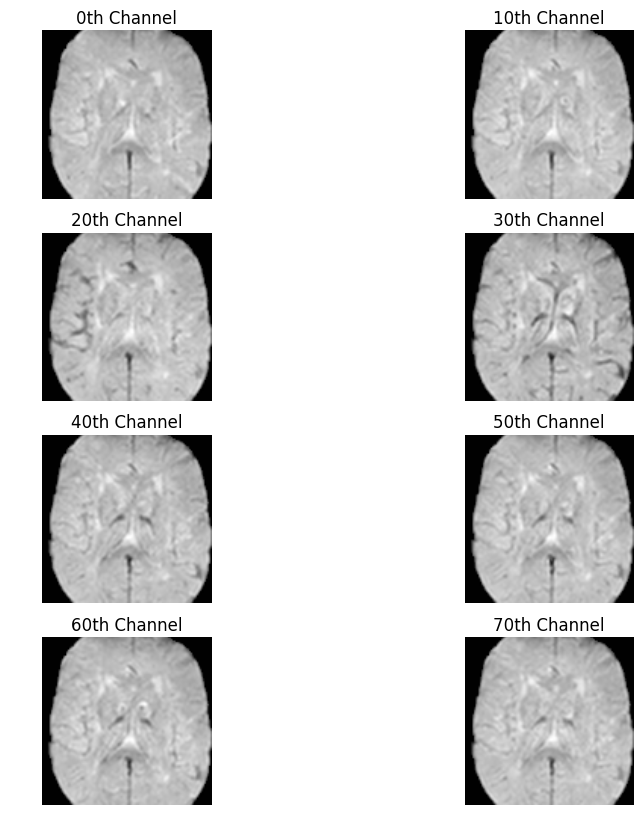

In [12]:
fname = sample_data[0].split('\\')[-1].split('.')[-3]
sitk_img = sitk.ReadImage(sample_data[0])
img = sitk.GetArrayFromImage(sitk_img)
print(img.shape)
for n in range(8):
    plt.rcParams["figure.figsize"] = (10,10)
    plt.subplot(4,2,n+1); plt.axis('off'); plt.title(str(n*10)+'th Channel')
    plt.imshow(img[9, 40:-40, 40:-40, n*10], 'gray')#, interpolation='nearest', aspect='equal')
plt.show()


# Display where negative value in the 4DPWI

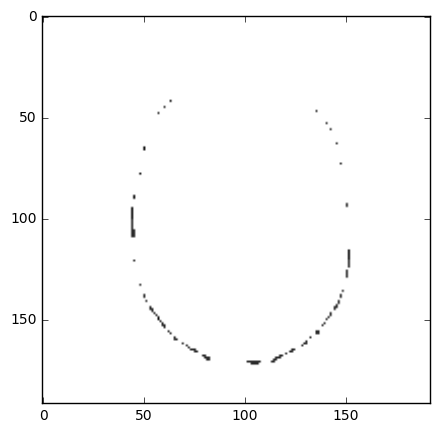

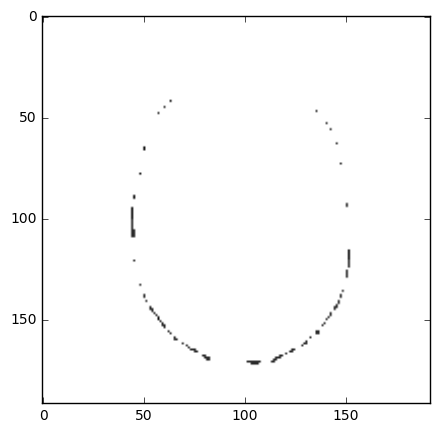

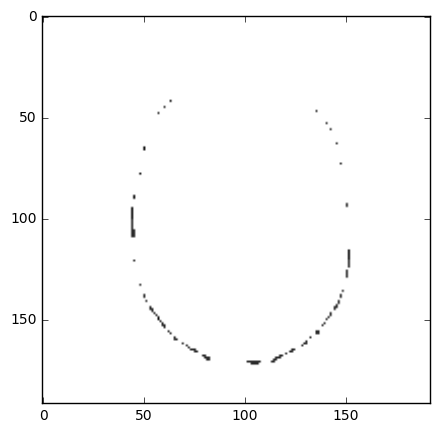

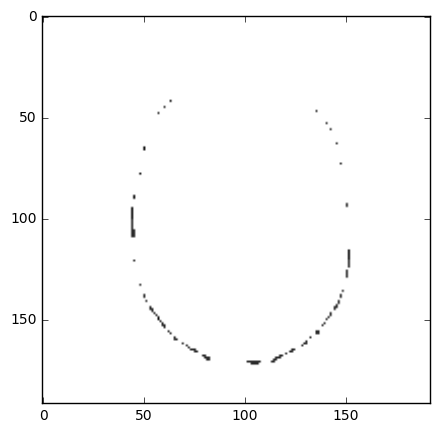

In [39]:
fname = sample_data[0].split('\\')[-1].split('.')[-3]
sitk_img = sitk.ReadImage(sample_data[0])
img = sitk.GetArrayFromImage(sitk_img)
img_ = np.where(img > 0, 0, img)

for i in range(4):
    plt.figure(figsize=(5,5))
    plt.imshow(img_[9,:,:,i*20], 'gray')
    plt.show()

# Image Samples

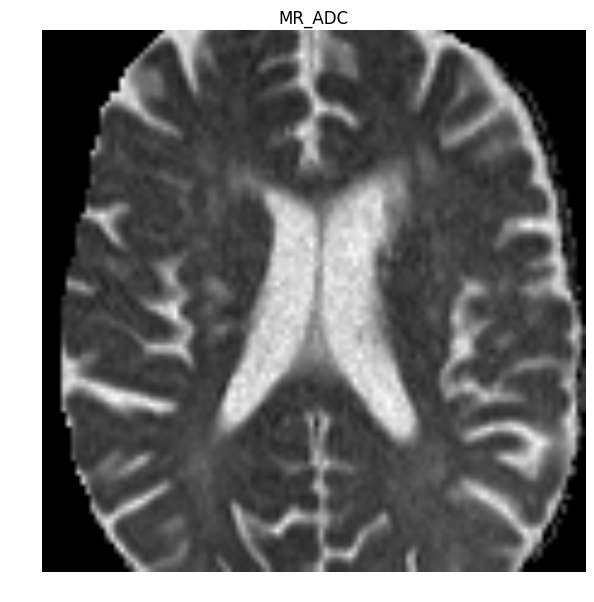

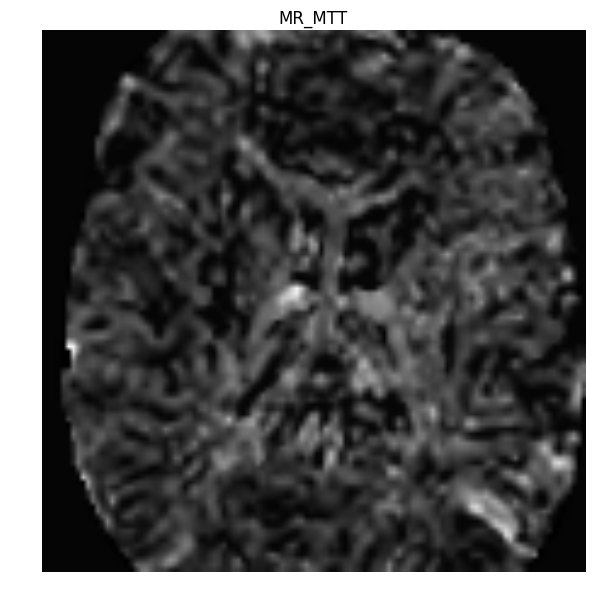

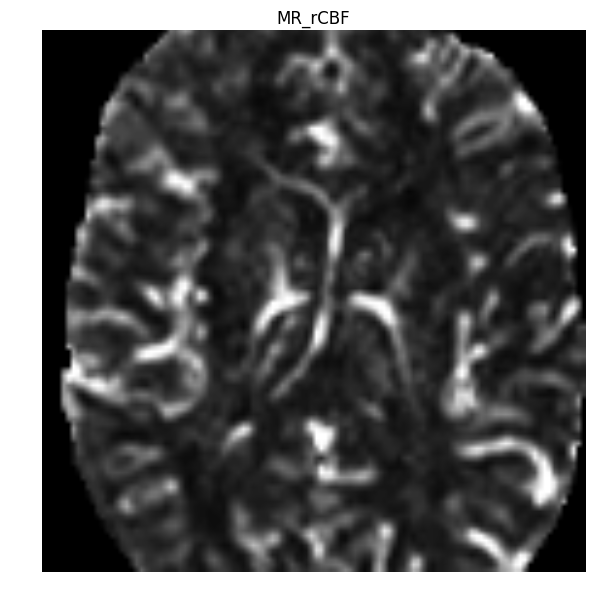

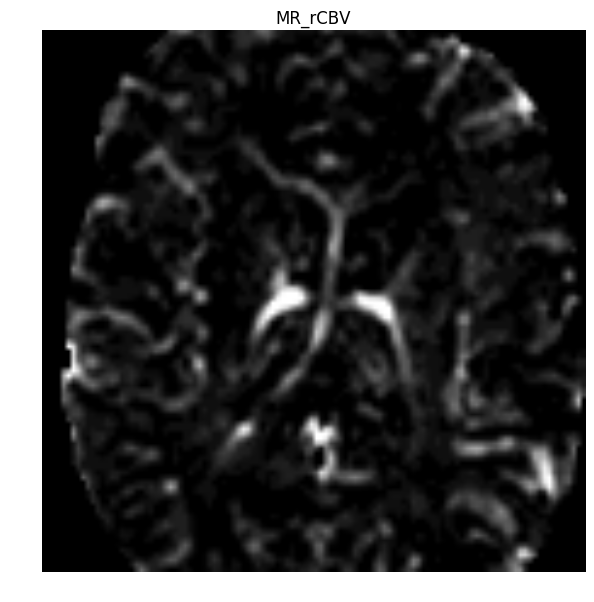

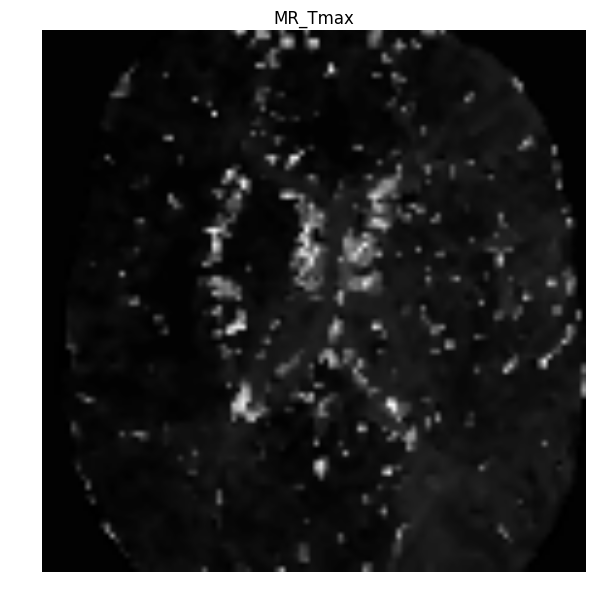

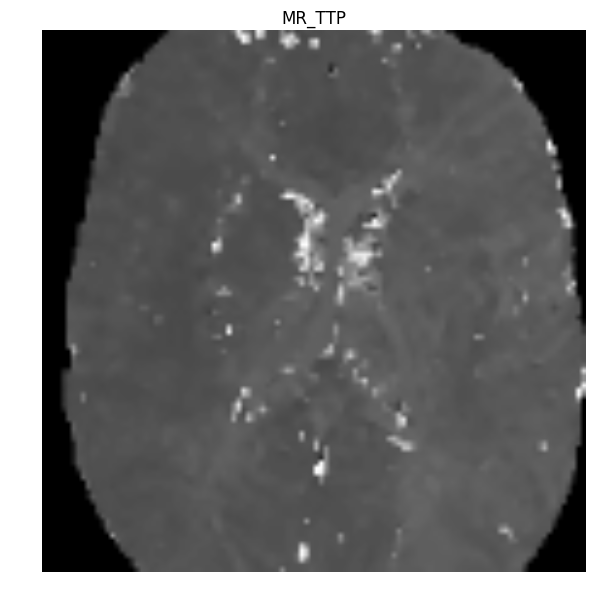

In [20]:
for img_path in sample_data[1:-1]:
    sitk_img = sitk.ReadImage(img_path)
    img = sitk.GetArrayFromImage(sitk_img)
    fname = img_path.split('\\')[-1].split('.')[-3]
    
    plt.figure(figsize=(7,7))
    #plt.subplot(4,2,n+1)
    plt.axis('off')
    plt.title(fname)
    plt.imshow(img[9, 40:-40, 40:-40], 'gray')#, interpolation='nearest', aspect='equal')
    plt.show()